In [55]:
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [7]:
item_to_id = pd.read_csv("item_to_id.csv")
display(item_to_id.head())
display(item_to_id.info())
display(item_to_id.isnull().any(axis=0))
sorted(item_to_id['Item_id'].tolist())

,Item_name,Item_id
0,coffee,43
1,tea,23
2,juice,38
3,soda,9
4,sandwich loaves,39


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Item_name  48 non-null     object
 1   Item_id    48 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 896.0+ bytes


None

Item_name    False
Item_id      False
dtype: bool

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48]

In [3]:
history = pd.read_csv("purchase_history.csv")
display(history.head())
display(history.info())
display(history.isnull().any(axis=0))

,user_id,id
0,222087,"27,26"
1,1343649,"6,47,17"
2,404134,"18,12,23,22,27,43,38,20,35,1"
3,1110200,"9,23,2,20,26,47,37"
4,224107,"31,18,5,13,1,21,48,16,26,2,44,32,20,37,42,35,4..."


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39474 entries, 0 to 39473
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  39474 non-null  int64 
 1   id       39474 non-null  object
dtypes: int64(1), object(1)
memory usage: 616.9+ KB


None

user_id    False
id         False
dtype: bool

In [5]:
len(history.user_id.unique()) # unique customers 

24885

In [9]:
type(history['id'][0]) # str
history['id'][0].split(',')

['27', '26']

In [19]:
def item_count(hist_df):
    # return a series that map each item id to its purchase count
    
    # series of list->put into one long list
    ids = hist_df['id'].str.split(',').sum()
    # initial count for each item
    id_list = [0]*48
    for i in ids:
        id_list[int(i)-1]+=1
    return pd.Series(id_list,index = list(range(1,49)))

In [20]:
# groupby-> each subset (a dataframe ) containing one user's purchase 
user_item_count = history.groupby('user_id').apply(item_count)

In [21]:
user_item_count.head()

,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
user_id,,,,,,,,,,,,,,,,,,,,,
47,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,0,0
68,0,0,0,0,0,1,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0
113,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
123,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
223,1,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [45]:
# the customer who bought the most items
user_total_count= user_item_count.sum(axis=1).reset_index().rename(columns={0:'count'})
user_count.head()

,user_id,count
0,47,13
1,68,8
2,113,11
3,123,4
4,223,11


In [46]:
user_count.sort_values(by='count',ascending=False).head()
# user 269335 has purchased 72 items in total

,user_id,count
4445,269335,72
6111,367872,70
6623,397623,64
9918,599172,64
6291,377284,63


In [51]:
# question 2  for each item, find the customer who bought the most
item_user_most = user_item_count.apply(np.argmax,axis=0).reset_index()
item_user_most=item_user_most.rename(columns={'index':'Item_id',0:'User_id'})
item_user_most.head()


,Item_id,User_id
0,1,512
1,2,512
2,3,2552
3,4,92
4,5,3605


In [50]:
user_item_count.head()

,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
user_id,,,,,,,,,,,,,,,,,,,,,
47,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,0,0
68,0,0,0,0,0,1,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0
113,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
123,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
223,1,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


0                                                 [27, 26]
1                                              [6, 47, 17]
2                  [18, 12, 23, 22, 27, 43, 38, 20, 35, 1]
3                               [9, 23, 2, 20, 26, 47, 37]
4        [31, 18, 5, 13, 1, 21, 48, 16, 26, 2, 44, 32, ...
                               ...                        
39469                                  [48, 42, 44, 10, 2]
39470    [23, 21, 26, 27, 41, 9, 47, 43, 20, 40, 16, 24...
39471    [3, 39, 28, 4, 1, 43, 47, 27, 18, 25, 44, 10, ...
39472                   [13, 39, 20, 32, 37, 1, 3, 18, 34]
39473          [39, 40, 20, 3, 10, 42, 38, 43, 28, 25, 13]
Name: id, Length: 39474, dtype: object

In [53]:
# question 2 clustering
feature = user_item_count.T
feature.head()

user_id,47,68,113,123,223,281,323,394,420,453,...,1499502,1499523,1499563,1499702,1499727,1499730,1499778,1499797,1499817,1499974
1,0,0,0,0,1,0,1,1,0,1,...,0,0,1,0,0,0,0,0,1,0
2,1,0,0,0,1,0,0,1,1,1,...,1,0,1,0,0,0,1,0,2,0
3,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [56]:
# K-Mean clustering
clusters = range(2,30)
inertias = []
silhouettes = []
for n_clusters in clusters:
    kmeans = KMeans(n_clusters=n_clusters,init='k-means++',random_state=32,n_jobs=-1)
    kmeans= kmeans.fit(feature)
    label = kmeans.predict(feature)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(feature,label))


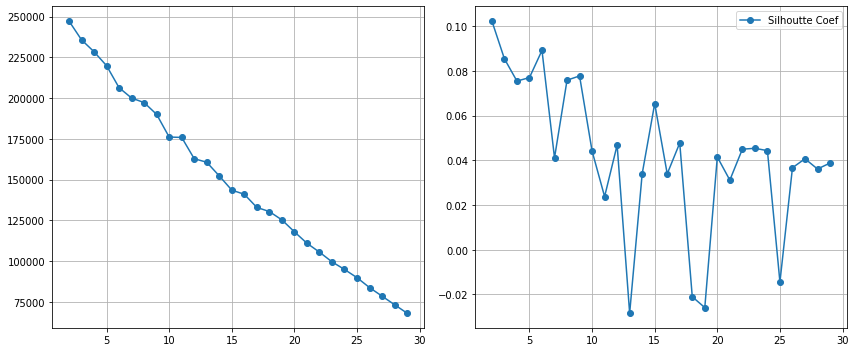

In [58]:
fig , ax = plt.subplots(nrows=1,ncols=2,figsize=(12,5))
ax[0].plot(clusters,inertias,'o-',label='Sum of square distances')
ax[0].grid(True)
ax[1].plot(clusters,silhouettes,'o-',label='Silhoutte Coef')
ax[1].grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [59]:
kmeans = KMeans(n_clusters=19,init='k-means++',random_state=32)
kmeans = kmeans.fit(feature)
label=  kmeans.predict(feature)

In [60]:
pca = PCA(n_components=2,random_state=32)
pca=pca.fit(feature)
pca_feature=pca.transform(feature)

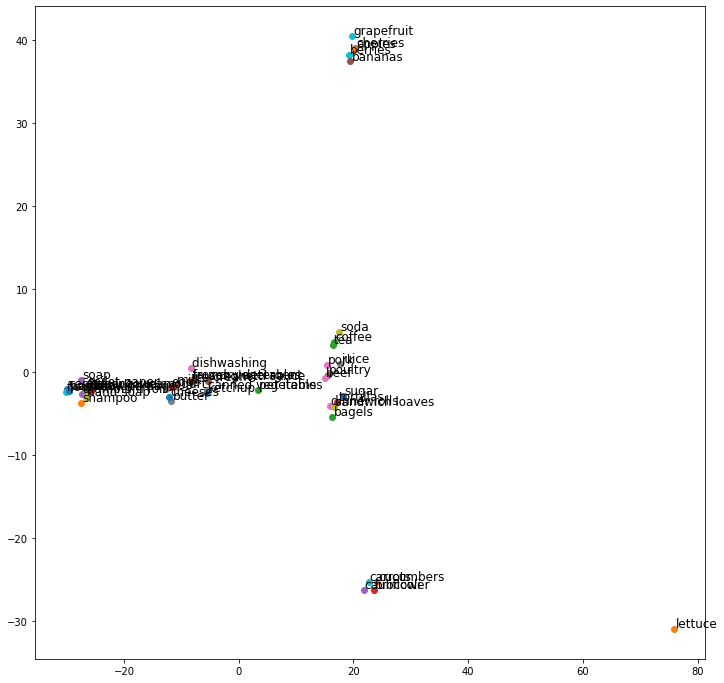

In [62]:
fig,ax = plt.subplots(figsize=(12,12))
for j in range(len(pca_feature)):
    x = pca_feature[j][0]
    y= pca_feature[j][1]
    ax.plot(x,y,'o')
    name=item_to_id[item_to_id['Item_id']==j+1]['Item_name']
    ax.annotate(xy=(x+0.2, y+0.2), s=name.values[0], fontsize=12)
plt.show()